### Nepal Housing Prediction Project

#### Life-cycle of Machine Learning Project

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training
* Choose best model

### ABOUT

This is a regression dataset of nepali housing project.In this dataset we have the datels that we normally consisder before purchasing housing in Nepal.

### 1) Problem Statement

* The dataset we use is a housing data set collected in 2020 in nepal through help of diff estate sites.
* There seems to be hard to predict the price of house so this will help the user to predict the hous price.

### 2) Data Collection

* The data is collecte from the local real estate site of nepal.
https://www.kaggle.com/datasets/nishanpokh/house-price-dataset-nepal


#### Importing necessary libaries and Loading Dataset.

In [2]:
# data manuplation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#### LOADING DATASET.

In [3]:
df=pd.read_csv("nepalhousing_dataset.csv")

##### SHOW TOP 5

In [4]:
df.head()

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,PROPERTY AGE,Air Condition,...,TV,TV Cable,Terrace,Washing Machine,Water Filter,Water Purifier,Water Supply,Water Tank,Water Well,Wifi
0,"Imadol, Lalitpur",29000000.0,1369.000,12,west,3.0,5.0,4.0,5.0,0,...,0,0,1,0,0,0,0,0,0,0
1,"Satdobato, Lalitpur",47500000.0,1026.750,10,west,4.5,5.0,6.0,5.0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Imadol, Lalitpur",19900000.0,787.175,10,west,2.5,4.0,4.0,21.0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Bhaisepati, Lalitpur",40000000.0,2395.750,12,north-west,2.5,4.0,3.0,22.0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bhaisepati, Lalitpur",33000000.0,1095.200,13,north-west,2.5,4.0,3.0,7.0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
df_without_ammenities=df.iloc[:,:8]
df_without_ammenities.head()

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM
0,"Imadol, Lalitpur",29000000.0,1369.000,12,west,3.0,5.0,4.0
1,"Satdobato, Lalitpur",47500000.0,1026.750,10,west,4.5,5.0,6.0
2,"Imadol, Lalitpur",19900000.0,787.175,10,west,2.5,4.0,4.0
3,"Bhaisepati, Lalitpur",40000000.0,2395.750,12,north-west,2.5,4.0,3.0
4,"Bhaisepati, Lalitpur",33000000.0,1095.200,13,north-west,2.5,4.0,3.0


In [6]:
df_without_ammenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     5568 non-null   object 
 1   PRICE        5244 non-null   float64
 2   LAND AREA    5512 non-null   float64
 3   ROAD ACCESS  5564 non-null   object 
 4   FACING       5408 non-null   object 
 5   FLOOR        5456 non-null   float64
 6   BEDROOM      5152 non-null   float64
 7   BATHROOM     5032 non-null   float64
dtypes: float64(5), object(3)
memory usage: 348.1+ KB


In [7]:
df_without_ammenities.shape

(5568, 8)

In [8]:
df_without_ammenities.isnull().sum()/len(df_without_ammenities)*100

LOCATION       0.000000
PRICE          5.818966
LAND AREA      1.005747
ROAD ACCESS    0.071839
FACING         2.873563
FLOOR          2.011494
BEDROOM        7.471264
BATHROOM       9.626437
dtype: float64

##### All majority of features have missing value that is lessthen 10% of total data , where price is out target values so we show drop all the missing value from target value and will use simple imputer for rest features.

In [9]:
features=[feature for feature in df_without_ammenities.columns]

num_feature=[feature for feature in features if df_without_ammenities[feature].dtype!="O"]
cate_feature=[feature for feature in features if df_without_ammenities[feature].dtype=="O"]


### UNIVATIATE ANALYSIS
* The process of analysis of single feature from the dataframe is called univariate analysis.
* In this process we check the distribution and dependacy of feature for prediction.


In [14]:
for feature in num_feature:
    print(f"The minimun value of {feature} is :{df[feature].min()}")

The minimun value of PRICE is :2680000.0
The minimun value of LAND AREA is :0.0
The minimun value of FLOOR is :1.0
The minimun value of BEDROOM is :1.0
The minimun value of BATHROOM is :1.0


#### The feature LAND AREA has 0 as min value so it must be droped

#### Numerical Feature

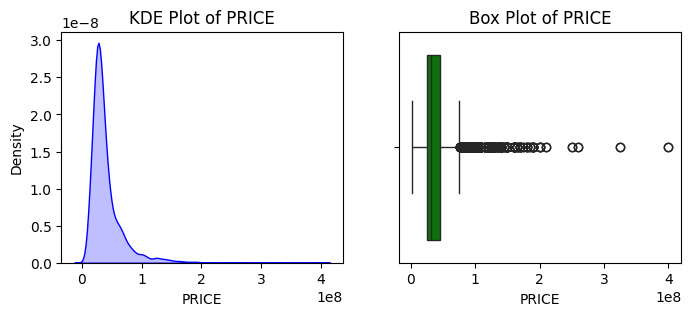

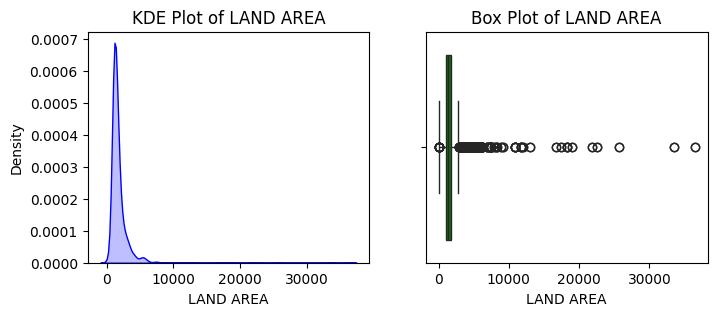

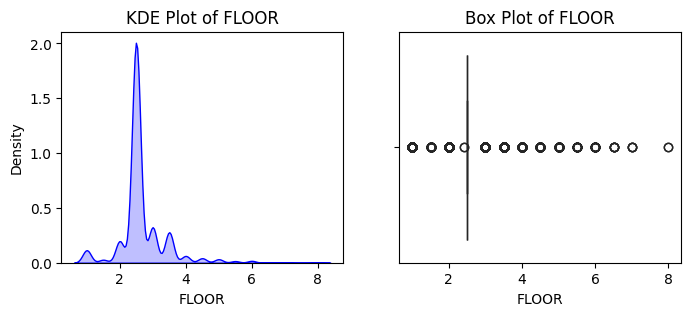

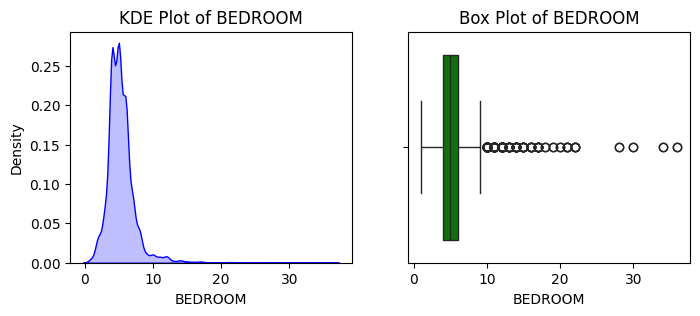

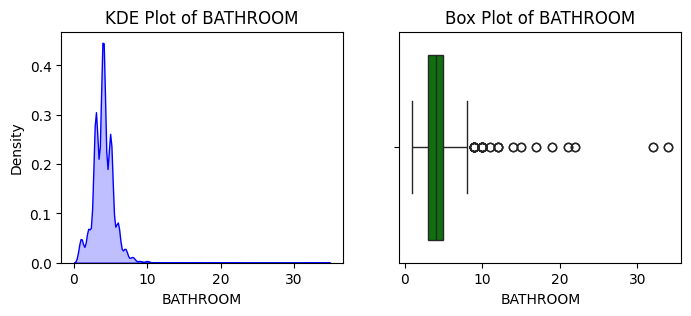

In [10]:
for feature in num_feature:
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    

    sns.kdeplot(data=df, x=feature, ax=ax[0], fill=True,color='blue')
    ax[0].set_title(f'KDE Plot of {feature}')

    sns.boxplot(data=df, x=feature, ax=ax[1],color='green')
    ax[1].set_title(f'Box Plot of {feature}')

    

### Observation from Numerical Features.
* Target value- price is somewhat normally drstribuated and has few outliers but its look okey ,
* Land area - is leftscrewed and covers somes outliers,
* Floor - contains some spiky kde which needs to be power transformed,
* bedroom - is leftscred with a spike,
* Bathroom - is also left scred and has spikes.

#### Categorical Feature

<Axes: xlabel='FACING', ylabel='Count'>

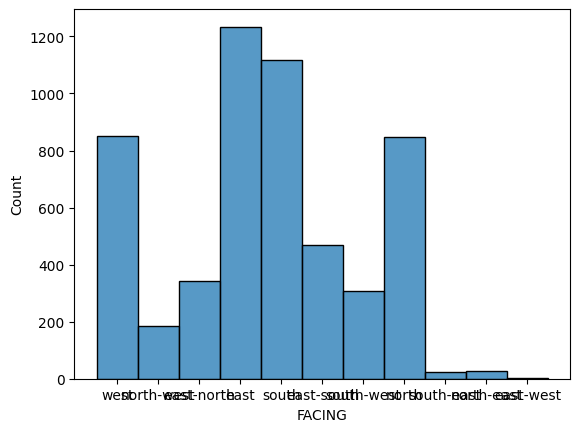

In [11]:
sns.histplot(data=df['FACING'])

In [15]:
df['LOCATION'].value_counts()

LOCATION
Imadol, Lalitpur             456
Budhanilkantha, Kathmandu    344
Bhaisepati, Lalitpur         324
Dhapasi, Kathmandu           136
Kapan, Kathmandu             108
                            ... 
Jagdol, Kathmandu              2
Siran Bazar, Dhading           2
Manbhawan, Lalitpur            2
Aaptari, Chitwan               2
 Bhatbhateni,  Kathmandu       2
Name: count, Length: 488, dtype: int64

<Axes: >

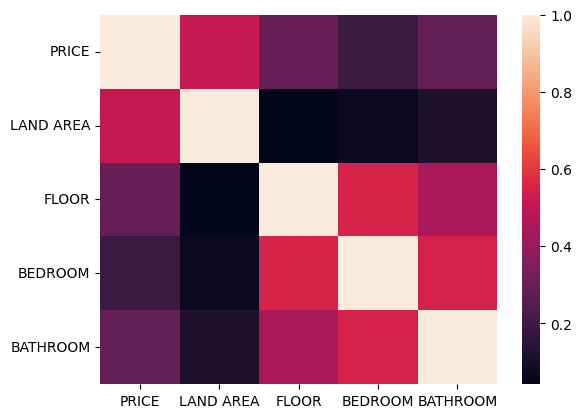

In [12]:
sns.heatmap(data=df_without_ammenities.corr(numeric_only=True))